In [34]:
import os
import cv2
import torch
import matplotlib.pyplot as plt

In [35]:
IMG_FOLDER = "imgs"
MODEL_PATH = "model/mnist_resnet18.onnx"

In [40]:
def load_images(img_path):
    img_list = []
    for img_name in os.listdir(img_path):
        img = cv2.imread(os.path.join(img_path, img_name))
        img_list.append(img)
    return img_list

def predict_image(img_list, model_path):
    outputs = []
    model = cv2.dnn.readNetFromONNX(model_path)
    for image in img_list:
        blob = cv2.dnn.blobFromImage(
            image, scalefactor=1 / 255.0, size=(28, 28), swapRB=False
        )
        model.setInput(blob)
        output = model.forward()
        outputs.append(output)
    return outputs

In [41]:
images = load_images(IMG_FOLDER)
outputs = predict_image(images, MODEL_PATH)

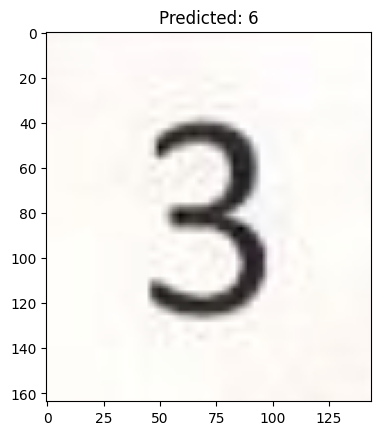

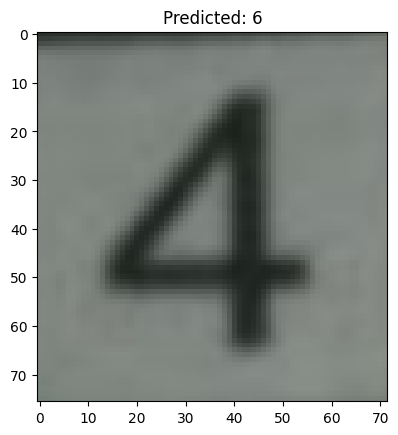

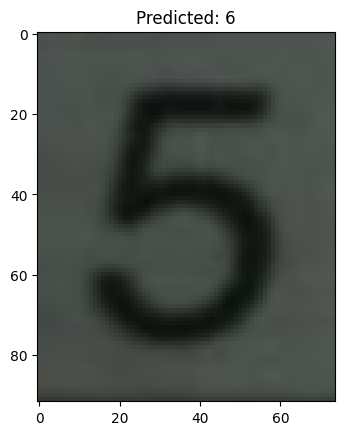

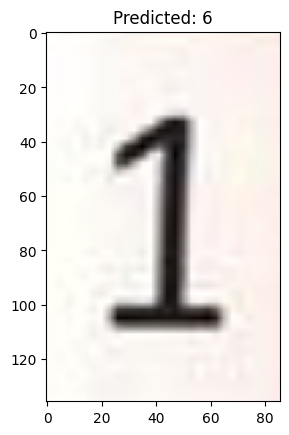

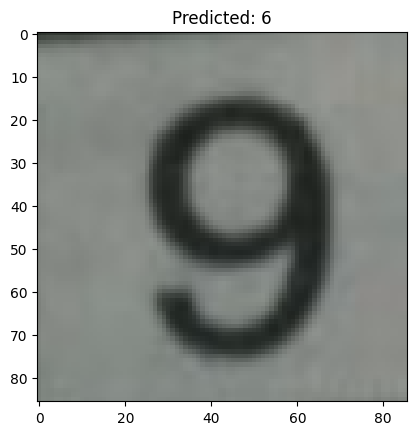

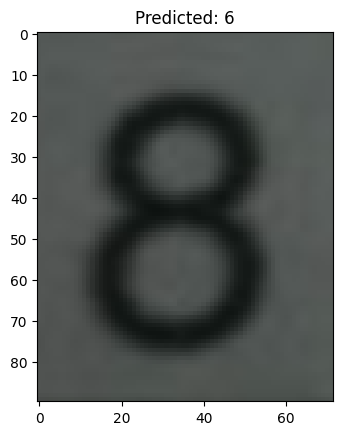

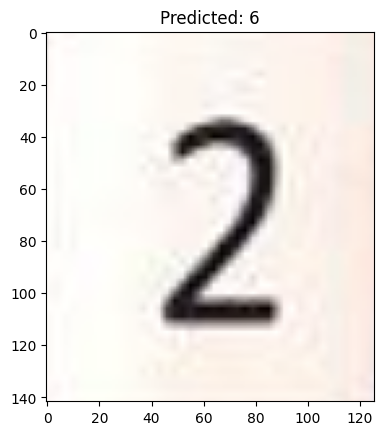

In [42]:
for i, image in enumerate(images):
    plt.imshow(image)
    plt.title(f"Predicted: {torch.argmax(torch.tensor(outputs[i]))}")
    plt.show()